# Dual Elemental Initial Data

> Autor: Jordi Gomara Cruz

Aquest notebook està encarregat crear les dades inicials segons un algoritme que compara la distància i moviment entre en Thomas i el
Secret Boss.

## 1 - ANÀLISI EXPLORATÒRIA DE DADES

### 1.1 - Visió general

1 - X: Posició de les X de Thomas

2 - Y: Posició de les Y de Thomas

3 - Attack1: Atac 1 de Thomas

4 - Attack2: Atac 2 de Thomas

5 - Kick: Atac de cama de Thomas

6 - DualAttack: Atac doble de punys de Thomas

7 - Ability: Habilitat de Thomas (Onada fosca)

8 - Protect: Habilitat de protecció de Thomas

9 - Jump: Thomas saltant

10 - Damage: Thomas ha rebut dolor

11 - EnemyX: Posició de les X de l'enemic

12 - EnemyY: Posició de les Y de l'enemic

13 - EnemyDamage: Enemic ha rebut dolor

14 - moveCode: moviment que farà l'enemic

### 1.2 - Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving moves2024-04-22_12-43-42.csv to moves2024-04-22_12-43-42.csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]), sep=';')
df

,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,moveCode
0,"-1,454","-3,945924",0,0,0,0,0,0.0,0.0,0.0,"-0,4020162","-3,850072",0.0,Jump
1,"-1,454","-3,945924",0,0,0,0,0,0.0,0.0,0.0,"-0,4088539","-3,877514",0.0,Jump
2,"-1,454","-3,945924",0,0,0,0,0,0.0,0.0,0.0,"-0,4088539","-3,877514",0.0,Jump
3,"-1,454","-3,945924",0,0,0,0,0,0.0,0.0,0.0,"-0,4088539","-3,877514",0.0,Jump
4,"-1,454","-3,945924",0,0,0,0,0,0.0,0.0,0.0,"-0,4088539","-3,877514",0.0,Jump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118412,"-1,948906","-3,951962",0,0,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
118413,"-1,948906","-3,951962",0,0,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
118414,"-1,948906","-3,951962",0,0,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
118415,"-1,948906","-3,951962",0,0,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118417 entries, 0 to 118416
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   X            118417 non-null  object 
 1   Y            118417 non-null  object 
 2   Attack1      118417 non-null  int64  
 3   Attack2      118417 non-null  int64  
 4   Kick         118417 non-null  int64  
 5   DualAttack   118417 non-null  int64  
 6   Ability      118417 non-null  int64  
 7   Protect      118416 non-null  float64
 8   Jump         118416 non-null  float64
 9   Damage       118416 non-null  float64
 10  EnemyX       115100 non-null  object 
 11  EnemyY       115100 non-null  object 
 12  EnemyDamage  115100 non-null  float64
 13  moveCode     102171 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 12.6+ MB


### 1.3. - Tractament de dades

Primerament, elimino els nulls que hi hagi perquè, quan creo els datasets, els deixo una estona més després de derrotar la IA perquè no perdin informació per deixar de llegir massa ràpid. També protegeixo moveCode transformant els nulls de les dades inicials perquè no significa que no hi hagi informació, sinó que no s'ha fet cap
moviment.

#### 1.3.1 - Eliminació de nulls

In [ ]:
print(df.isnull().sum())

X                  0
Y                  0
Attack1            0
Attack2            0
Kick               0
DualAttack         0
Ability            0
Protect            1
Jump               1
Damage             1
EnemyX          3317
EnemyY          3317
EnemyDamage     3317
moveCode       16246
dtype: int64


Cal protegir els nulls en moveCode.

In [ ]:
df["moveCode"].fillna("", inplace=True)
print(df.isnull().sum())

X                 0
Y                 0
Attack1           0
Attack2           0
Kick              0
DualAttack        0
Ability           0
Protect           1
Jump              1
Damage            1
EnemyX         3317
EnemyY         3317
EnemyDamage    3317
moveCode          0
dtype: int64


In [ ]:
df_without_nulls = df.dropna()
print(df_without_nulls.isnull().sum())
df_without_nulls

X              0
Y              0
Attack1        0
Attack2        0
Kick           0
DualAttack     0
Ability        0
Protect        0
Jump           0
Damage         0
EnemyX         0
EnemyY         0
EnemyDamage    0
moveCode       0
dtype: int64


,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,moveCode
0,"-1,454","-3,945924",0,0,0,0,0,0.0,0.0,0.0,"-0,4020162","-3,850072",0.0,Jump
1,"-1,454","-3,945924",0,0,0,0,0,0.0,0.0,0.0,"-0,4088539","-3,877514",0.0,Jump
2,"-1,454","-3,945924",0,0,0,0,0,0.0,0.0,0.0,"-0,4088539","-3,877514",0.0,Jump
3,"-1,454","-3,945924",0,0,0,0,0,0.0,0.0,0.0,"-0,4088539","-3,877514",0.0,Jump
4,"-1,454","-3,945924",0,0,0,0,0,0.0,0.0,0.0,"-0,4088539","-3,877514",0.0,Jump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115095,"-3,655765","-3,950008",0,0,1,0,0,0.0,0.0,0.0,"-3,781115","-3,663444",0.0,Jump
115096,"-3,655765","-3,950008",0,0,1,0,0,0.0,0.0,0.0,"-3,781115","-3,663444",0.0,Jump
115097,"-3,655765","-3,950008",0,0,1,0,0,0.0,0.0,0.0,"-3,781115","-3,663444",0.0,Jump
115098,"-3,655765","-3,950008",0,0,1,0,0,0.0,0.0,0.0,"-3,781115","-3,663444",0.0,Jump


#### 1.3.2 - Transformacions dels valors i eliminar repetits

Seguidament, elimino els camps repetits consecutius perquè, com que Unity crea cada fila frame per frame, alguns cops hi ha frames que no canvien res i són dades que no aporten informació nova i que no ajuden a millorar l'eficiència en llegir el dataset quan juga la IA. També, transformo els camps als tipus respectius. Torno a remarcar que Unity interpreta els decimals amb comes i Python amb punts.

In [ ]:
df_next_move = df_without_nulls.copy()[(df_without_nulls != df_without_nulls.shift()).any(axis=1)]
df_next_move['X'] = df_next_move['X'].str.replace(',', '.').astype(float)
df_next_move['Y'] = df_next_move['Y'].str.replace(',', '.').astype(float)
df_next_move['EnemyX'] = df_next_move['EnemyX'].str.replace(',', '.').astype(float)
df_next_move['EnemyY'] = df_next_move['EnemyY'].str.replace(',', '.').astype(float)
df_next_move['Attack1'] = df_next_move['Attack1'].astype(int)
df_next_move['Attack2'] = df_next_move['Attack2'].astype(int)
df_next_move['Kick'] = df_next_move['Kick'].astype(int)
df_next_move['DualAttack'] = df_next_move['DualAttack'].astype(int)
df_next_move['Ability'] = df_next_move['Ability'].astype(int)
df_next_move['Protect'] = df_next_move['Protect'].astype(int)
df_next_move['Jump'] = df_next_move['Jump'].astype(int)
df_next_move['Damage'] = df_next_move['Damage'].astype(int)
df_next_move['EnemyDamage'] = df_next_move['EnemyDamage'].astype(int)
df_next_move

,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,moveCode
0,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.402016,-3.850072,0,Jump
1,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.408854,-3.877514,0,Jump
14,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.415692,-3.908879,0,Jump
16,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.422529,-3.944169,0,Jump
25,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.427517,-3.952570,0,Jump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115048,-3.542043,-3.950008,0,0,1,0,0,0,0,0,-3.672962,-3.448772,0,Shoot
115058,-3.570474,-3.950008,0,0,1,0,0,0,0,0,-3.705010,-3.493489,0,Jump
115069,-3.598904,-3.950008,0,0,1,0,0,0,0,0,-3.733291,-3.547475,0,Jump
115080,-3.627335,-3.950008,0,0,1,0,0,0,0,0,-3.757203,-3.603498,0,Jump


In [ ]:
df_next_move.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 10592 entries, 0 to 115089
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X            10592 non-null  float64
 1   Y            10592 non-null  float64
 2   Attack1      10592 non-null  int64  
 3   Attack2      10592 non-null  int64  
 4   Kick         10592 non-null  int64  
 5   DualAttack   10592 non-null  int64  
 6   Ability      10592 non-null  int64  
 7   Protect      10592 non-null  int64  
 8   Jump         10592 non-null  int64  
 9   Damage       10592 non-null  int64  
 10  EnemyX       10592 non-null  float64
 11  EnemyY       10592 non-null  float64
 12  EnemyDamage  10592 non-null  int64  
 13  moveCode     10592 non-null  object 
dtypes: float64(4), int64(9), object(1)
memory usage: 1.2+ MB


#### 1.3.3 - Afegir moviments inicials de secretBoss

Com que les dades inicials no tenen el camp moveCode correctament configurat, cal afegir els valors segons el que hauria de fer la IA en cada cas. Repassem els casos i les respostes que hauria de retornar.

**Versió antiga**

Si no hi ha molta distància entre Thomas (< 0.5m):
- Thomas.attack1 → Protect
- Thomas.attack2 → Jump
- Thomas.ability → Protect
- Thomas.Protect:
 - Si Thomas està a l’esquerra → Right
 - Si Thomas està a la dreta → Left
- Thomas.Jump → Jump
- Thomas.Damage → Punch
- Nothing → Punch

Si hi ha molta distància entre Thomas (>= 0.5m):
- Thomas.attack1 → Shoot
- Thomas.attack2 → Shoot
- Thomas.ability → Jump
- Thomas.Protect:
 - Si Thomas està a l’esquerra → Left
 - Si Thomas està a la dreta → Right
- Thomas.Jump:
 - Si Thomas està a l’esquerra → Left
 - Si Thomas està a la dreta → Right
- Thomas.Damage → Shoot
- Nothing → Shoot

**Versió actual**

Si no hi ha molta distància entre Thomas (< 0.5m):
- Thomas.attack1 → Protect
- Thomas.attack2 → Protect
- Thomas.kick → Jump
- Thomas.dualAttack → Protect
- Thomas.ability → Protect
- Thomas.Protect → Punch
- Thomas.Jump → Jump
- Thomas.Damage → Punch
- Nothing → Punch

Si hi ha molta distància entre Thomas (>= 0.5m):
- Thomas.attack1 → Shoot
- Thomas.attack2 → Shoot
- Thomas.kick → Shoot
- Thomas.dualAttack → Shoot
- Thomas.ability → Jump
- Thomas.Protect:
 - Si Thomas està a l’esquerra → Left
 - Si Thomas està a la dreta → Right
 - O Shoot
- Thomas.Jump:
 - Si Thomas està a l’esquerra → Left
 - Si Thomas està a la dreta → Right
 - O Jump
- Thomas.Damage → Shoot
- Nothing → Shoot

In [ ]:
minDistance = 0.5

def selectMoveCode(row):
    distanceDifference = abs(row["X"] - row["EnemyX"])
    if row["Attack1"] > 0:
        return "Shoot" if distanceDifference >= minDistance else "Protect"
    if row["Attack2"] > 0:
        return "Shoot" if distanceDifference >= minDistance else "Protect"
    if row["Kick"] > 0:
        return "Shoot" if distanceDifference >= minDistance else "Jump"
    if row["DualAttack"] > 0:
        return "Shoot" if distanceDifference >= minDistance else "Protect"
    if row["Ability"] > 0:
        return "Jump" if distanceDifference >= minDistance else "Protect"
    if row["Protect"] > 0:
        if (distanceDifference >= minDistance):
            return "Left" if row["X"] < row["EnemyX"] else "Right"
        return "Punch"
    if row["Jump"] > 0:
        return "Jump"
    if row["Damage"] > 0:
        return "Shoot" if distanceDifference >= minDistance else "Punch"
    return "Shoot" if distanceDifference >= minDistance else "Punch"

In [ ]:
df_next_move["moveCode"] = df_next_move.apply(selectMoveCode, axis=1)
df_next_move

,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,moveCode
0,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.402016,-3.850072,0,Shoot
1,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.408854,-3.877514,0,Shoot
14,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.415692,-3.908879,0,Shoot
16,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.422529,-3.944169,0,Shoot
25,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.427517,-3.952570,0,Shoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115048,-3.542043,-3.950008,0,0,1,0,0,0,0,0,-3.672962,-3.448772,0,Jump
115058,-3.570474,-3.950008,0,0,1,0,0,0,0,0,-3.705010,-3.493489,0,Jump
115069,-3.598904,-3.950008,0,0,1,0,0,0,0,0,-3.733291,-3.547475,0,Jump
115080,-3.627335,-3.950008,0,0,1,0,0,0,0,0,-3.757203,-3.603498,0,Jump


<Axes: >

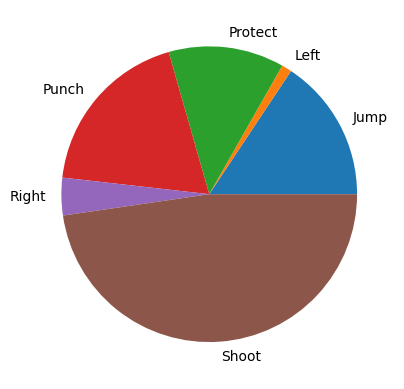

In [ ]:
df_next_move.groupby('moveCode').size().plot(kind='pie')

In [ ]:
df_next_move_cat = df_next_move.copy()
df_next_move_cat['moveCode'] = df_next_move_cat['moveCode'].astype('category')
df_next_move_cat['moveCode_cat'] = df_next_move_cat['moveCode'].cat.codes
df_next_move_cat = df_next_move_cat.drop('moveCode', axis=1)
df_next_move_cat

,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,moveCode_cat
0,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.402016,-3.850072,0,5
1,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.408854,-3.877514,0,5
14,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.415692,-3.908879,0,5
16,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.422529,-3.944169,0,5
25,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.427517,-3.952570,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115048,-3.542043,-3.950008,0,0,1,0,0,0,0,0,-3.672962,-3.448772,0,0
115058,-3.570474,-3.950008,0,0,1,0,0,0,0,0,-3.705010,-3.493489,0,0
115069,-3.598904,-3.950008,0,0,1,0,0,0,0,0,-3.733291,-3.547475,0,0
115080,-3.627335,-3.950008,0,0,1,0,0,0,0,0,-3.757203,-3.603498,0,0


Finalment, per acabar amb aquest notebook, era important la revisió de la correlació entre camps per comprovar que els moviments i/o animacions s'han activat com a mínim un cop a la partida per no influir en l'aprenentatge del videojoc (sobretot perquè són les dades inicials).

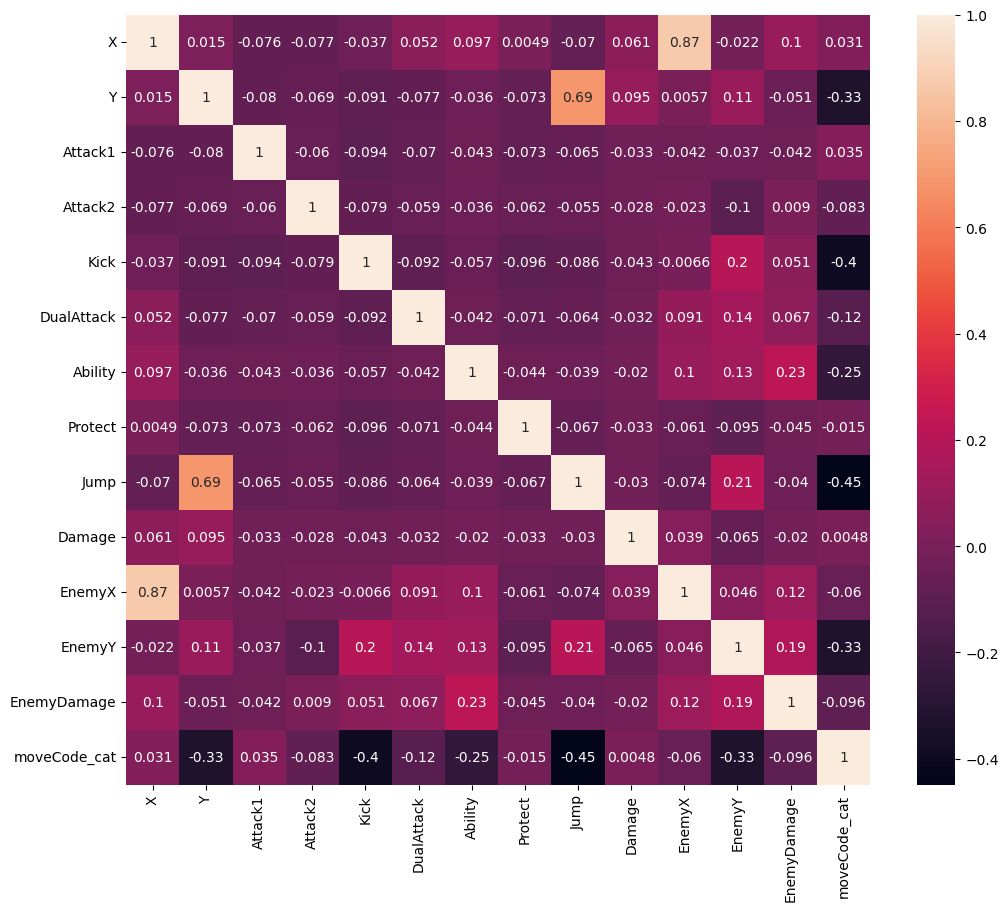

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(12,10))
cor = df_next_move_cat.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
file_name = next(iter(uploaded))
file_name

'moves2024-04-22_12-43-42.csv'

In [ ]:
import datetime

df_next_move.to_csv("initial" + file_name.split("moves")[1], sep=';', index=False)